<h1 style="color: #f73779	;"> ChapterCraft: Insights Beyond Pages 📖 </h1>

<h1 style="color: #F08080	;">01. Libraries </h1>

In [3]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings # nobody likes warnings
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 👩🏼‍🏫 Statistics 
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association


# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #F08080;">02. Data Extraction </h1>

In [5]:
df_books = pd.read_csv('df_books.csv')
df_books.head(4)

,TITLE,AUTHOR,GENRE1,GENRE2,GENRE3,FORMAT,PAGES,DESCRIPTION,PUBLISHED,PUBLISHED_YEAR,STARS,RATINGS
0,The Complete Stories and Poems,Edgar Allan Poe,Poetry,Horror,Fiction,Hardcover,821.0,This single volume brings together all of Poe'...,"November 1, 1849",1849,4.40,280794
1,The Old Man and the Sea,Ernest Hemingway,Fiction,Literature,Novels,Hardcover,96.0,"This short novel, already a modern classic, is...","September 1, 1952",1952,3.80,1198272
2,Interview with the Vampire,Anne Rice,Fantasy,Fiction,Vampires,Paperback,346.0,"This is the story of Louis, as told in his own...","April 12, 1976",1976,4.02,609274
3,Don Quixote,Miguel de Cervantes Saavedra,Classics,Literature,Spanish Literature,Paperback,1023.0,Don Quixote has become so entranced by reading...,"January 1, 1605",1605,3.90,281892


In [6]:
df_books.columns

Index(['TITLE', 'AUTHOR', 'GENRE1', 'GENRE2', 'GENRE3', 'FORMAT', 'PAGES',
       'DESCRIPTION', 'PUBLISHED', 'PUBLISHED_YEAR', 'STARS', 'RATINGS'],
      dtype='object')

<h1 style="color: #F08080;">03. Initial Exploration </h1>

<h2 style="color: #FFA07A;"> Columns standardization</h2>

In [9]:
df_books.columns = df_books.columns.str.lower().str.replace(" ", "_")

<h2 style="color: #FFA07A;">Exploring the Data </h2>

In [11]:
df_books.shape

(9637, 12)

In [12]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9637 entries, 0 to 9636
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           9636 non-null   object 
 1   author          9636 non-null   object 
 2   genre1          9637 non-null   object 
 3   genre2          9637 non-null   object 
 4   genre3          9637 non-null   object 
 5   format          9637 non-null   object 
 6   pages           9637 non-null   float64
 7   description     9623 non-null   object 
 8   published       9637 non-null   object 
 9   published_year  9637 non-null   int64  
 10  stars           9637 non-null   float64
 11  ratings         9637 non-null   int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 903.6+ KB


<h2 style="color: #FFA07A;">Copy as best practices</h2>

In [14]:
df = df_books.copy()

<h1 style="color: #F08080;">04. Data Cleaning </h1>

<h2 style="color: #FFA07A;">Dealing with Duplicates, Nan and Empty Spaces</h2>

In [17]:
#Duplicated data
df.duplicated().sum()

0

In [18]:
#Nan values
df.isna().sum()

title              1
author             1
genre1             0
genre2             0
genre3             0
format             0
pages              0
description       14
published          0
published_year     0
stars              0
ratings            0
dtype: int64

In [19]:
#Empty spaces
df.eq(' ').sum()

title             0
author            0
genre1            0
genre2            0
genre3            0
format            0
pages             0
description       0
published         2
published_year    0
stars             0
ratings           0
dtype: int64

<h2 style="color: #FFA07A;">Mapping Genders </h2>

In [21]:
df.genre1.unique()

array(['Poetry', 'Fiction', 'Fantasy', 'Classics', 'Historical Fiction',
       'Memoir', 'Young Adult', 'Science Fiction', 'Russia',
       'Picture Books', 'Mystery', 'Nonfiction', 'Contemporary',
       'Coming Of Age', 'Dystopia', 'Romance', 'Horror', 'Mythology',
       'Erotica', 'Thriller', 'Travel', 'Music', 'LGBT', 'Plays',
       'Vampires', 'Adventure', 'Mystery Thriller',
       'Psychological Thriller', 'Paranormal', 'Literary Fiction',
       'Middle Grade', 'Write a Review', 'Animals', 'Kindle $5.99',
       'Science Fiction Fantasy', 'Magical Realism', 'Philosophy',
       'Childrens', 'France', 'Humor', 'Novels', 'New Adult', 'Business',
       'Medical', 'Graphic Novels', 'Self Help', 'Dragons', 'Ireland',
       'Contemporary Romance', 'Artificial Intelligence', 'Crime',
       'Biography', 'Book details & editions', 'Russian Literature',
       'Epic', 'Sociology', 'Writing', 'China', 'Zombies',
       'Short Stories', 'Politics', 'Japan', 'Sports', 'Time Travel',
 

In [22]:
#Create a dictionary with genre1 that we have and the genders we want.
genre_mapping = {
    'Poetry': 'Literature',
    'Fiction': 'Fiction',
    'Fantasy': 'Fantasy',
    'Classics': 'Classics',
    'Historical Fiction': 'Fiction',
    'Memoir': 'Nonfiction',
    'Young Adult': 'Young Adult',
    'Science Fiction': 'Science Fiction',
    'Picture Books': 'Childrens',
    'Mystery': 'Mystery/Thriller',
    'Nonfiction': 'Nonfiction',
    'Contemporary': 'Fiction',
    'Coming Of Age': 'Fiction',
    'Dystopia': 'Science Fiction',
    'Romance': 'Romance',
    'Horror': 'Horror',
    'Mythology': 'Mythology',
    'Erotica': 'Romance',
    'Thriller': 'Mystery/Thriller',
    'Travel': 'Nonfiction',
    'Music': 'Nonfiction',
    'LGBT': 'Fiction',
    'Plays': 'Literature',
    'Adventure': 'Fiction',
    'Psychological Thriller': 'Mystery/Thriller',
    'Paranormal': 'Fantasy',
    'Literary Fiction': 'Fiction',
    'Childrens': 'Childrens',
    'Graphic Novels': 'Comics/Graphic Novels',
    'Self Help': 'Nonfiction',
    'Magical Realism': 'Fantasy',
    'Philosophy': 'Nonfiction',
    'Humor': 'Fiction',
    'New Adult': 'Young Adult',
    'Biography': 'Nonfiction',
    'Sociology': 'Nonfiction',
    'Writing': 'Nonfiction',
    'Zombies': 'Horror',
    'Politics': 'Nonfiction',
    'Sports': 'Nonfiction',
    'Time Travel': 'Science Fiction',
    'Psychology': 'Nonfiction',
    'Witches': 'Fantasy',
    'Action': 'Fiction',
    'Urban Fantasy': 'Fantasy',
    'Feminism': 'Nonfiction',
    'History': 'Nonfiction',
    'Space Opera': 'Science Fiction',
    'Education': 'Nonfiction',
    'Epic Fantasy': 'Fantasy',
    'Magic': 'Fantasy',
    'Paranormal Romance': 'Romance',
    'True Crime': 'Nonfiction',
    'Comedy': 'Fiction',
    'Gothic': 'Fiction',
    'High Fantasy': 'Fantasy',
    'Christian': 'Religion',
    'Christian Fiction': 'Religion',
    'Science': 'Nonfiction',
    'Nature': 'Nonfiction',
    'War': 'Historical',
    'Manga': 'Comics/Graphic Novels',
    'Inspirational': 'Nonfiction',
    'Chick Lit': 'Romance',
    'Teen': 'Young Adult',
    'Cooking': 'Nonfiction',
    'Economics': 'Nonfiction',
    'Military Fiction': 'Historical',
    'Westerns': 'Fiction',
    'Fan Fiction': 'Fiction',
    'Post Apocalyptic': 'Science Fiction',
    'Victorian': 'Classics',
    'Technology': 'Nonfiction',
    'Personal Development': 'Nonfiction',
}

#We apply our dictionary to our column 
df['genre1'] = df['genre1'].map(genre_mapping).fillna('Other')


In [23]:
df.genre2.unique()

array(['Horror', 'Literature', 'Fiction', 'Fantasy', 'Africa',
       'Philosophy', 'Biography', 'Thriller', 'School', 'Vampires',
       'Dystopia', 'Classics', 'Young Adult', 'Romance', 'China',
       'Adventure', 'Crime', 'Contemporary', 'Historical Fiction',
       'Urban Fantasy', 'Russia', 'Historical', 'Literary Fiction',
       'LGBT', 'Gothic', 'Mystery Thriller', 'Science Fiction',
       'New Adult', 'Christian', 'Drama', 'Cyberpunk', 'Canada', 'Poetry',
       'Queer', 'Magical Realism', 'Childrens', 'Paranormal', 'Holocaust',
       'Science Fiction Fantasy', 'Mystery', 'Memoir', 'Plays',
       'Contemporary Romance', 'Epic Fantasy', 'Business',
       'Native American', 'Humor', 'Mythology', 'American', 'Nonfiction',
       'Filters', 'France', 'Dogs', 'Middle Grade', 'Novels',
       'Spirituality', 'True Story', 'Paranormal Romance', 'India',
       'Chick Lit', 'Epic', 'Audiobook', 'World War II', 'Time Travel',
       'Psychology', 'Short Stories', 'Fae', 'Retelling

In [24]:
genre2_mapping = {
    'Horror': 'Horror',
    'Literature': 'Literature',
    'Fiction': 'Fiction',
    'Fantasy': 'Fantasy',
    'Africa': 'Nonfiction',
    'Philosophy': 'Nonfiction',
    'Biography': 'Nonfiction',
    'Thriller': 'Mystery/Thriller',
    'School': 'Nonfiction',
    'Vampires': 'Fantasy',
    'Dystopia': 'Science Fiction',
    'Classics': 'Classics',
    'Young Adult': 'Young Adult',
    'Romance': 'Romance',
    'China': 'Nonfiction',
    'Adventure': 'Fiction',
    'Crime': 'Mystery/Thriller',
    'Contemporary': 'Fiction',
    'Historical Fiction': 'Fiction',
    'Urban Fantasy': 'Fantasy',
    'Russia': 'Nonfiction',
    'Historical': 'Historical',
    'Literary Fiction': 'Fiction',
    'LGBT': 'Fiction',
    'Gothic': 'Fiction',
    'Mystery Thriller': 'Mystery/Thriller',
    'Science Fiction': 'Science Fiction',
    'New Adult': 'Young Adult',
    'Christian': 'Nonfiction',
    'Drama': 'Fiction',
    'Cyberpunk': 'Science Fiction',
    'Canada': 'Nonfiction',
    'Poetry': 'Literature',
    'Queer': 'Fiction',
    'Magical Realism': 'Fantasy',
    'Childrens': 'Childrens',
    'Paranormal': 'Fantasy',
    'Holocaust': 'Historical',
    'Science Fiction Fantasy': 'Science Fiction',
    'Mystery': 'Mystery/Thriller',
    'Memoir': 'Nonfiction',
    'Plays': 'Literature',
    'Contemporary Romance': 'Romance',
    'Epic Fantasy': 'Fantasy',
    'Business': 'Nonfiction',
    'Native American': 'Nonfiction',
    'Humor': 'Fiction',
    'Mythology': 'Mythology',
    'American': 'Nonfiction',
    'Nonfiction': 'Nonfiction',
    'Filters': 'Nonfiction',
    'France': 'Nonfiction',
    'Dogs': 'Nonfiction',
    'Middle Grade': 'Childrens',
    'Novels': 'Fiction',
    'Spirituality': 'Nonfiction',
    'True Story': 'Nonfiction',
    'Paranormal Romance': 'Romance',
    'India': 'Nonfiction',
    'Chick Lit': 'Romance',
    'Epic': 'Historical',
    'Audiobook': 'Other',
    'World War II': 'Historical',
    'Time Travel': 'Science Fiction',
    'Psychology': 'Nonfiction',
    'Short Stories': 'Fiction',
    'Fae': 'Fantasy',
    'Retellings': 'Fantasy',
    'Medicine': 'Nonfiction',
    'Spanish Literature': 'Nonfiction',
    'Comics': 'Comics/Graphic Novels',
    'Suspense': 'Mystery/Thriller',
    'Books About Books': 'Nonfiction',
    'Science Fiction Romance': 'Science Fiction',
    'Irish Literature': 'Nonfiction',
    'Angels': 'Fantasy',
    'Food': 'Nonfiction',
    'Space Opera': 'Science Fiction',
    'Write a Review': 'Other',
    'Leadership': 'Nonfiction',
    'Politics': 'Nonfiction',
    'Language': 'Nonfiction',
    'Military Fiction': 'Historical',
    'Dragons': 'Fantasy',
    'Adult': 'Fiction',
    'Sports': 'Nonfiction',
    'Graphic Novels': 'Comics/Graphic Novels',
    'War': 'Historical',
    'High Fantasy': 'Fantasy',
    'Japanese Literature': 'Nonfiction',
    'Fantasy Romance': 'Romance',
    'Self Help': 'Nonfiction',
    'History': 'Nonfiction',
    'Animals': 'Nonfiction',
    'Music': 'Nonfiction',
    'German Literature': 'Nonfiction',
    'Social Justice': 'Nonfiction',
    'Aliens': 'Science Fiction',}


df['genre2'] = df['genre2'].map(genre2_mapping).fillna('Other')


In [25]:
df.genre3.unique()

array(['Fiction', 'Novels', 'Vampires', 'Spanish Literature',
       'Science Fiction', 'Classics', 'Spirituality', 'Literature',
       'Paranormal', 'Childrens', 'Post Apocalyptic', 'Horror', 'Fantasy',
       'Young Adult', 'Russian Literature', 'Magic', 'Crime', 'Mystery',
       'Historical Fiction', 'China', 'Mystery Thriller', 'Contemporary',
       'History', 'Contemporary Romance', 'Literary Fiction', 'War',
       'New Adult', 'Audiobook', 'Middle Grade', 'School', 'Romance',
       'Short Stories', 'Religion', 'Psychology', 'BDSM', 'Time Travel',
       'Adult', 'German Literature', 'Humor', 'Theatre', 'France',
       'Book Club', 'Fae', 'High School', 'Historical', 'Travel',
       'Paranormal Romance', 'Thriller', 'Russia', 'Dragons', 'Politics',
       'Biography Memoir', 'High Fantasy', 'American History',
       'Classic Literature', 'Science Fiction Fantasy', 'Jewish',
       'Christianity', '6 likes', 'Comedy', 'Personal Development',
       'Adult Fiction', 'Christi

In [26]:
genre3_mapping = {
    'Fiction': 'Fiction',
    'Novels': 'Fiction',
    'Vampires': 'Fantasy',
    'Spanish Literature': 'Regional',
    'Science Fiction': 'Science Fiction',
    'Classics': 'Classics',
    'Spirituality': 'Nonfiction',
    'Literature': 'Literature',
    'Paranormal': 'Fantasy',
    'Childrens': 'Childrens',
    'Post Apocalyptic': 'Science Fiction',
    'Horror': 'Horror',
    'Fantasy': 'Fantasy',
    'Young Adult': 'Young Adult',
    'Russian Literature': 'Regional',
    'Magic': 'Fantasy',
    'Crime': 'Mystery/Thriller',
    'Mystery': 'Mystery/Thriller',
    'Historical Fiction': 'Historical',
    'China': 'Regional',
    'Mystery Thriller': 'Mystery/Thriller',
    'Contemporary': 'Fiction',
    'History': 'Nonfiction',
    'Contemporary Romance': 'Romance',
    'Literary Fiction': 'Fiction',
    'War': 'Historical',
    'New Adult': 'Young Adult',
    'Audiobook': 'Other',
    'Middle Grade': 'Childrens',
    'School': 'Nonfiction',
    'Romance': 'Romance',
    'Short Stories': 'Fiction',
    'Religion': 'Nonfiction',
    'Psychology': 'Nonfiction',
    'BDSM': 'Romance',
    'Time Travel': 'Science Fiction',
    'Adult': 'Fiction',
    'German Literature': 'Regional',
    'Humor': 'Fiction',
    'Theatre': 'Literature',
    'France': 'Regional',
    'Book Club': 'Other',
    'Fae': 'Fantasy',
    'High School': 'Young Adult',
    'Historical': 'Historical',
    'Travel': 'Nonfiction',
    'Paranormal Romance': 'Romance',
    'Thriller': 'Mystery/Thriller',
    'Russia': 'Regional',
    'Dragons': 'Fantasy',
    'Politics': 'Nonfiction',
    'Biography Memoir': 'Nonfiction',
    'High Fantasy': 'Fantasy',
    'American History': 'Nonfiction',
    'Classic Literature': 'Classics',
    'Science Fiction Fantasy': 'Science Fiction',
    'Jewish': 'Nonfiction',
    'Christianity': 'Religion',
    'Comedy': 'Fiction',
    'Personal Development': 'Nonfiction',
    'Adult Fiction': 'Fiction',
    'Christian Fiction': 'Religion',
    'Epic Fantasy': 'Fantasy',
    'Chick Lit': 'Romance',
    'Retellings': 'Fantasy',
    'Adventure': 'Fiction',
    'French Literature': 'Regional',
    'Drama': 'Fiction',
    'Dystopia': 'Science Fiction',
    'British Literature': 'Regional',
    'Polish Literature': 'Regional',
    'Japan': 'Regional',
    'Self Help': 'Nonfiction',
    'Fantasy Romance': 'Romance',
    'College': 'Young Adult',
    'Philosophy': 'Nonfiction',
    'Sports': 'Nonfiction',
    'Young Adult Fantasy': 'Young Adult',
    '19th Century': 'Historical',
    'Comics': 'Comics/Graphic Novels',
    'Memoir': 'Nonfiction',
    'Economics': 'Nonfiction',
    'Science Fiction Romance': 'Science Fiction',
    'Autobiography': 'Nonfiction',
    'Suspense': 'Mystery/Thriller',
    'Italy': 'Regional',
    'Military Fiction': 'Historical',
    'Relationships': 'Nonfiction',
    'Victorian': 'Historical',
    'Romantasy': 'Romance',
    'Magical Realism': 'Fantasy',
    'Inspirational': 'Nonfiction',
    'Asia': 'Regional',
    'Urban Fantasy': 'Fantasy',
    'True Crime': 'Mystery/Thriller',
    'Mental Health': 'Nonfiction',
    'Irish Literature': 'Regional',
    'Productivity': 'Nonfiction',
    'Japanese Literature': 'Regional',
    'Action': 'Fiction',
    'Teen': 'Young Adult',
    'Australia': 'Regional',
    'Poetry': 'Literature',
    'Gothic': 'Fiction',
    'Alternate History': 'Science Fiction',
    'Biography': 'Nonfiction',
    'Arthurian': 'Mythology',
    'Space Opera': 'Science Fiction',
    'African American': 'Regional',
    'Medicine': 'Nonfiction',
    'Business': 'Nonfiction',
    'Social Justice': 'Nonfiction',
    'Cyberpunk': 'Science Fiction',
    'Science': 'Nonfiction',
    'Essays': 'Nonfiction',
    'Detective': 'Mystery/Thriller',
    'Leadership': 'Nonfiction',
    'Realistic Fiction': 'Fiction',
    'Mythology': 'Mythology',
    'Other': 'Other'  
}


df['genre3'] = df['genre3'].map(genre3_mapping).fillna('Other')


<h2 style="color: #FFA07A;"> Save the data in csv</h2>

In [28]:
#We leave this code as comment to avoid a double save. If its the first time you are using the script please eraise the # on the below 
#df.to_csv('libros_limpios.csv', index=False)

<h1 style="color: #F08080;">05. EDA </h1>

<h2 style="color: #FFA07A;"> Unique values</h2>

In [31]:
df.nunique().sort_values(ascending=False)

title             9636
description       9576
ratings           8993
published         4557
author            4534
pages             1005
published_year     333
stars              199
genre3              17
genre1              16
genre2              15
format               3
dtype: int64

In [32]:
df.format.unique()

array(['Hardcover', 'Paperback', 'Unknown'], dtype=object)

<h2 style="color: #FFA07A;">Divide the Numerical from the Categorical  </h2>

In [34]:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

In [35]:
cat.columns

Index(['title', 'author', 'genre1', 'genre2', 'genre3', 'format',
       'description', 'published'],
      dtype='object')

In [36]:
num.columns

Index(['pages', 'published_year', 'stars', 'ratings'], dtype='object')

<h2 style="color: #FFA07A;">Univarible Analysis</h2>

<h3 style="color: #f3b5b5;">Categorical</h3>

author
Stephen King          69
Agatha Christie       38
Terry Pratchett       38
Julie Mannino         35
Rick Riordan          35
                      ..
Rohith S. Katbamna     1
John Arcudi            1
Regina Maria Roche     1
Angel Di Zhang         1
Nyrae Dawn             1
Name: count, Length: 4534, dtype: int64


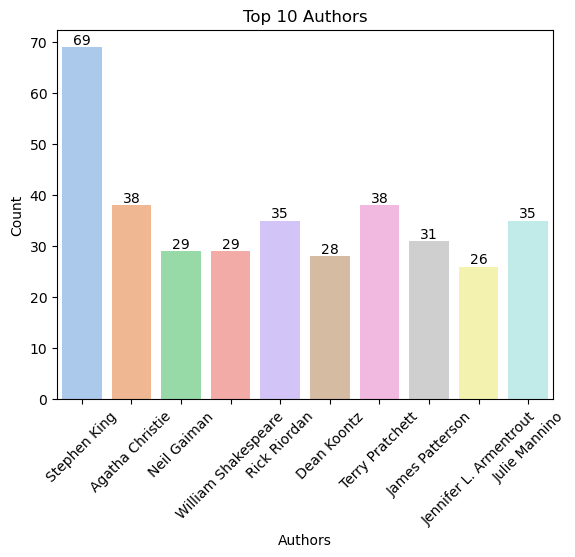

In [39]:
#author
#Remeber that the value_counts give us the values in order.
frequency_table_author = cat.author.value_counts()
print(frequency_table_author)

# Get the 10 most frequent authors
top_10_author = frequency_table_author.head(10).index

#Filter DFs to include only the 10 authors
filtered_authors = cat[cat['author'].isin(top_10_author)]

#Graphic the 10 authors
sns.countplot(
    x='author',
    data=filtered_authors,                       
    palette=sns.color_palette('pastel')
)
plt.ylabel('Count')
plt.xlabel('Authors')  
plt.title('Top 10 Authors') 
plt.xticks(rotation=45)  

for bar in plt.gca().patches:  #Get the bars of the graphic
    height = bar.get_height()  #Height of every bar (count)
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,  #Horizontal position.
        height,              #Bar height
        f'{int(height)}',   #This convert the number into integer.                
        ha='center',    #This indicate that the text should be at the center of the column                      
        va='bottom' #This indicate that the text should go at the bottom of the column                      
    )

plt.show()

genre1
Fiction                  2990
Other                    1595
Young Adult              1057
Nonfiction               1036
Fantasy                   667
Mystery/Thriller          576
Romance                   501
Classics                  455
Science Fiction           295
Horror                    139
Childrens                 124
Literature                 67
Mythology                  48
Comics/Graphic Novels      41
Religion                   34
Historical                 12
Name: count, dtype: int64


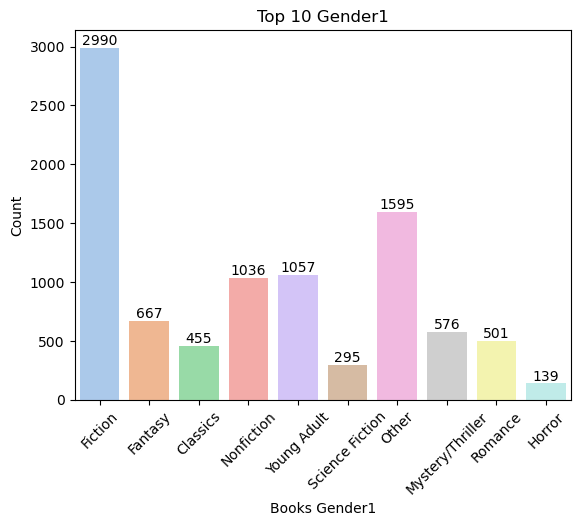

In [40]:
# genre1
frequency_table_genre1 = cat.genre1.value_counts()
print(frequency_table_genre1)

# Get the 10 most frequent genre1
top_10_genre1 = frequency_table_genre1.head(10).index

#Filter DFs to include only the 10 genre1
filtered_genre1 = cat[cat['genre1'].isin(top_10_genre1)]

#Graphic the 10 genre1
sns.countplot(
    x='genre1',
    data=filtered_genre1,                       
    palette=sns.color_palette('pastel')
)
plt.ylabel('Count')
plt.xlabel('Books Gender1')  
plt.title('Top 10 Gender1') 
plt.xticks(rotation=45)  

for bar in plt.gca().patches:  #Get the bars of the graphic
    height = bar.get_height()  #Height of every bar (count)
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,  #Horizontal position.
        height,              #Bar height
        f'{int(height)}',   #This convert the number into integer.                
        ha='center',    #This indicate that the text should be at the center of the column                      
        va='bottom' #This indicate that the text should go at the bottom of the column                      
    )

plt.show()

genre2
Fiction                  2658
Other                    1250
Nonfiction               1192
Fantasy                   993
Mystery/Thriller          834
Romance                   671
Science Fiction           373
Young Adult               372
Classics                  355
Historical                336
Childrens                 207
Literature                172
Horror                    122
Comics/Graphic Novels      62
Mythology                  40
Name: count, dtype: int64


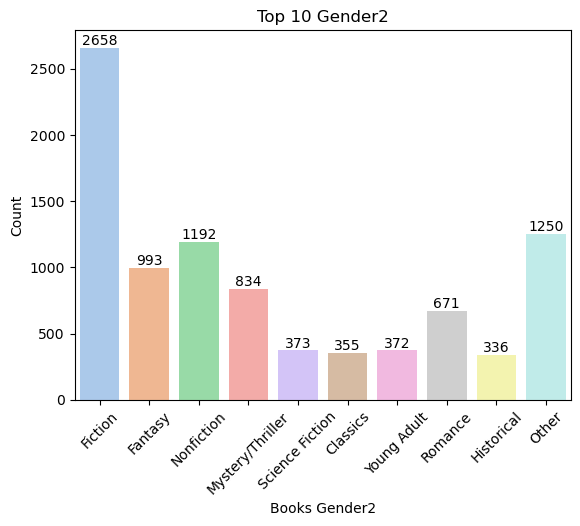

In [41]:
# genre2
frequency_table_genre2 = cat.genre2.value_counts()
print(frequency_table_genre2)

# Get the 10 most frequent genre2
top_10_genre2 = frequency_table_genre2.head(10).index

#Filter DFs to include only the 10 genre2
filtered_genre2 = cat[cat['genre2'].isin(top_10_genre2)]

#Graphic the 10 genre2
sns.countplot(
    x='genre2',
    data=filtered_genre2,                       
    palette=sns.color_palette('pastel')
)
plt.ylabel('Count')
plt.xlabel('Books Gender2')  
plt.title('Top 10 Gender2') 
plt.xticks(rotation=45)  

for bar in plt.gca().patches:  
    height = bar.get_height()  
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,  
        height,             
        f'{int(height)}',                  
        ha='center',                          
        va='bottom'                      
    )

plt.show()


genre3
Fiction                  2049
Other                    1920
Fantasy                  1113
Mystery/Thriller          813
Nonfiction                759
Romance                   655
Historical                490
Science Fiction           356
Classics                  316
Young Adult               313
Regional                  242
Childrens                 223
Literature                222
Horror                     90
Mythology                  33
Religion                   24
Comics/Graphic Novels      19
Name: count, dtype: int64


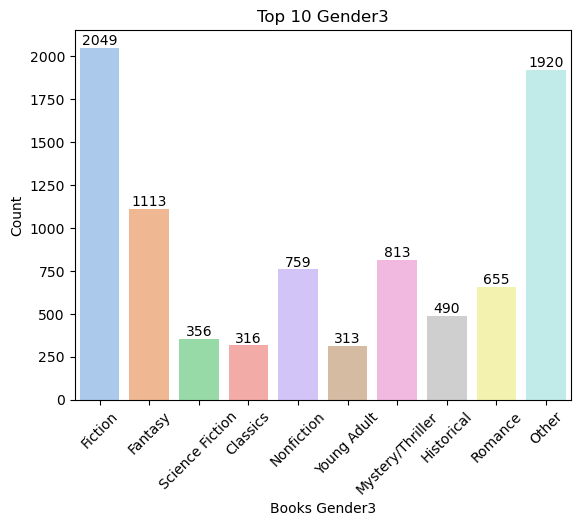

In [42]:
# genre3
frequency_table_genre3 = cat.genre3.value_counts()
print(frequency_table_genre3)

# Get the 10 most frequent genre1
top_10_genre3 = frequency_table_genre3.head(10).index

#Filter DFs to include only the 10 genre1
filtered_genre3 = cat[cat['genre3'].isin(top_10_genre3)]

#Graphic the 10 genre1
sns.countplot(
    x='genre3',
    data=filtered_genre3,                       
    palette=sns.color_palette('pastel')
)
plt.ylabel('Count')
plt.xlabel('Books Gender3')  
plt.title('Top 10 Gender3') 
plt.xticks(rotation=45)  

for bar in plt.gca().patches:  
    height = bar.get_height()  
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,  
        height,              
        f'{int(height)}',                   
        ha='center',                         
        va='bottom'                      
    )

plt.show()


format
Paperback    5229
Hardcover    2872
Unknown      1536
Name: count, dtype: int64


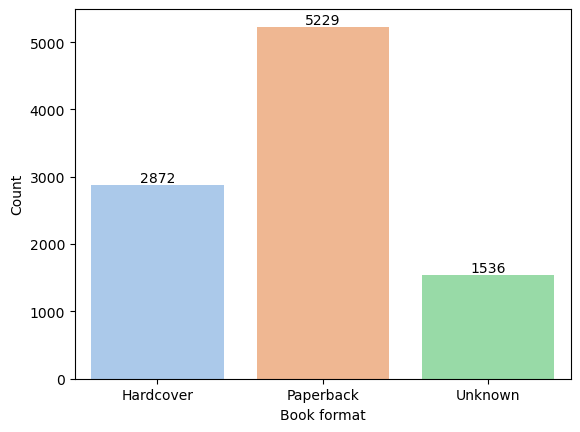

In [43]:
# format
frequency_table_format = cat.format.value_counts()
print(frequency_table_format)

sns.countplot(
    x='format',
    data=cat,                       
    palette=sns.color_palette('pastel'),  
)
plt.ylabel('Count')
plt.xlabel('Book format') 

for bar in plt.gca().patches:  
    height = bar.get_height()  
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,  
        height,              
        f'{int(height)}',                   
        ha='center',                         
        va='bottom'                      
    )
plt.show()

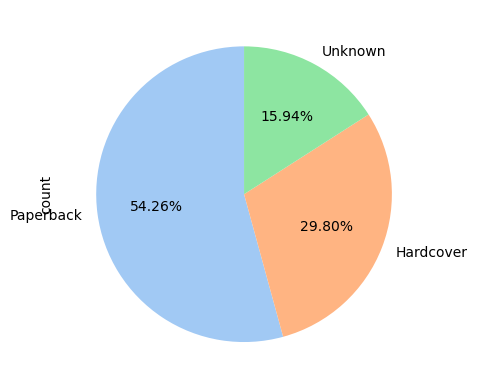

In [44]:
frequency_table_format.plot.pie(autopct='%1.2f%%' ,startangle=90, colors=sns.color_palette('pastel'))
plt.show()

<h3 style="color: #f3b5b5;">Numerical</h3>

<h4 style="color: #f3b5b5;">Describe of the numerical variables</h4>

In [47]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
pages,9637.0,381.376258,278.246014,2.0,261.00,344.00,438.00,8258.0
published_year,9637.0,1980.237626,157.605468,-800.0,1987.00,2007.00,2014.00,2024.0
stars,9637.0,4.050444,0.334799,0.0,3.89,4.07,4.24,5.0
ratings,9637.0,121967.691709,357328.240337,0.0,13677.00,38070.00,95901.00,10458003.0


**Insights from Stars** 

- The average (mean) stars of the books in the dataset is approximately `4.05`.

- The median stars (middle value when sorted) stands at `4.07`. Notably, the median is higher than the mean, suggesting a skew in the distribution of stars towards higher values.

- The standard deviation, a measure of the amount of variation or dispersion in the stars, is approximately `0.33`. This indicates that the stars can vary slightly from the average.

- The minimum  stars are 0 and maximum stars are 5, highlighting a wide range of books in the dataset.

- The interquartile range (IQR), given by the values at 25% (Q1) and 75% (Q3), is between `3.89` and `4.24`. This means that 50% of the books in the dataset were rated within this stars range.


<h4 style="color: #f3b5b5;">Shape of the Distribution</h4>

**Skewness** indicates the asymmetry of the distribution.

`Skewness = 0`: The distribution is perfectly symmetrical, resembling a normal distribution.


`Skewness > 0`: The distribution is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. The mass of the distribution is concentrated on the left of the figure.


`Skewness < 0`: The distribution is negatively skewed (or left-skewed), meaning there is a longer tail on the left side of the distribution. The mass of the distribution is concentrated on the right of the figure.

 **Kurtosis** indicates the "tailedness" or how peaked the distribution is.

`Excess Kurtosis = 0` (or Kurtosis = 3 for non-excess): The distribution has the same kurtosis as a normal distribution, known as mesokurtic. It indicates a distribution with tails similar to the normal distribution.


`Excess Kurtosis > 0` (or Kurtosis > 3 for non-excess): The distribution is leptokurtic. It has fatter tails and a sharper peak than the normal distribution, indicating more extreme values (outliers) than expected in a normal distribution.


`Excess Kurtosis < 0` (or Kurtosis < 3 for non-excess): The distribution is platykurtic. It has thinner tails and a flatter peak than the normal distribution, indicating fewer extreme values than expected in a normal distribution.

In [51]:
#Pages
sk_pages = num.pages.skew().round(2)
kurt_pages = num.pages.kurtosis().round(2)
print(f'The Skewness for pages is {sk_pages} and the kurtosis of {kurt_pages}')

The Skewness for pages is 10.05 and the kurtosis of 210.64


**Insights from Pages**:

1. **Skewness**: The positive value of skewness (10.05) for the 'pages' indicates that the distribution is right-skewed. This means that the tail on the right side (higher pages) is longer than the left side (lower pages). In practical terms, this suggests that there are a significant number of books that have more pages.
  
2. **Kurtosis**: The kurtosis value of 210.64 is greater than 3, which indicates that the 'pages' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'pages' than one would expect in a normally distributed set. This Kurtosis is not typical but as we would see in the outliers graphic there are a lot of atypical values or outliers. This is why we get  a very high Kurtosis, but is valid because of the type of value 'pages' that we are using.

The skewness and kurtosis values suggest that there are some books that have more pages than the majority, and these are affecting the overall distribution.

In [53]:
#stars
sk_stars = num.stars.skew().round(2)
kurt_stars = num.stars.kurtosis().round(2)
print(f'The Skewness for stars is {sk_stars} and the kurtosis is {kurt_stars}')

The Skewness for stars is -4.4 and the kurtosis is 50.17


**Insights from Stars**:

1. **Skewness**: The negative value of skewness (-4.4) for the 'stars' indicates that the distribution is left-skewed. Meaning there is a longer tail on the left side of the distribution. The mass of the distribution is concentrated on the right of the figure.

2. **Kurtosis**: The kurtosis value of 50.17 is greater than 3, which indicates that the 'stars' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'stars' than one would expect in a normally distributed set. 

The skewness and kurtosis values suggest that there are some books that have more stars than the majority.

In [55]:
#ratings
sk_ratings = num.ratings.skew().round(2)
kurt_ratings = num.ratings.kurtosis().round(2)
print(f'The Skewness for stars is {sk_ratings} and the kurtosis is {kurt_ratings}')

The Skewness for stars is 11.95 and the kurtosis is 236.44


**Insights from ratings**:


1. **Skewness**: The positive value of skewness (11.95) for the 'ratings' indicates that the distribution is right-skewed. This means that the tail on the right side (higher ratings) is longer than the left side (lower ratings). In practical terms, this suggests that there are a significant number of books that have a higher rating calcification.

  
2. **Kurtosis**: The kurtosis value of 236.44 is greater than 3, which indicates that the 'ratings' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'ratings' than one would expect in a normally distributed set.

<h4 style="color: #f3b5b5;">Distribution of the numerical variables</h4>

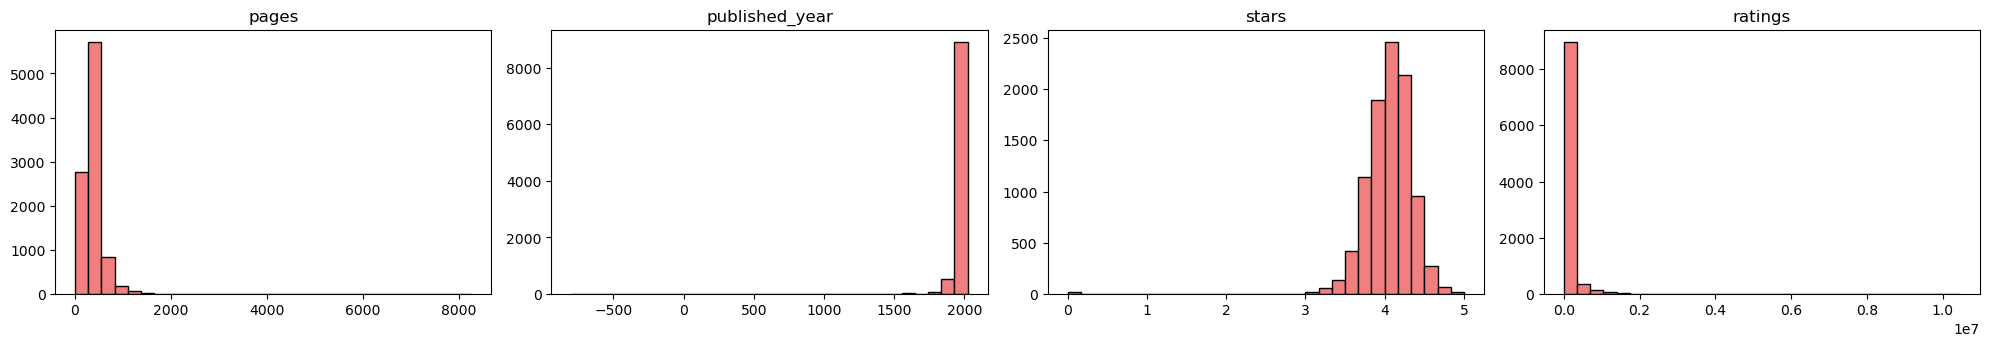

In [58]:
color = '#F08080'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

<h4 style="color: #f3b5b5;">Outliers</h4>

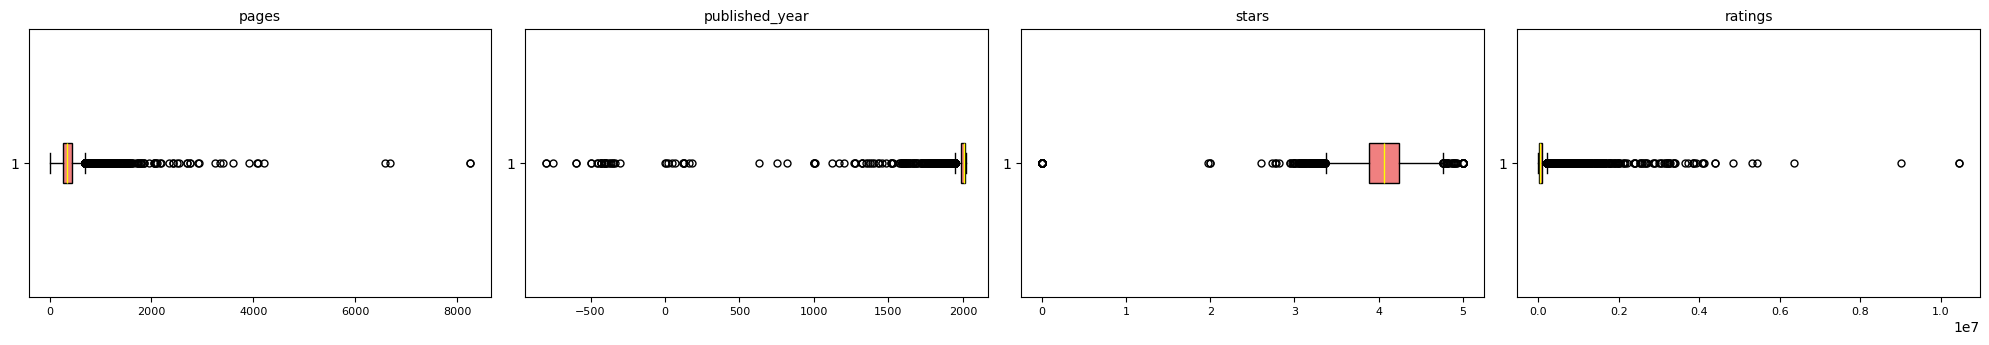

In [60]:
color = '#F08080'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):  # Asegúrate de usar num en lugar de df
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True,  # Cambia df a num aquí
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h2 style="color: #FFA07A;">Bivariate Analysis </h2>

<h4 style="color: #f3b5b5;">Categorical VS Continuous</h4>

Visualization:
Violin Plots
Bar Charts
Side by side Box Plots

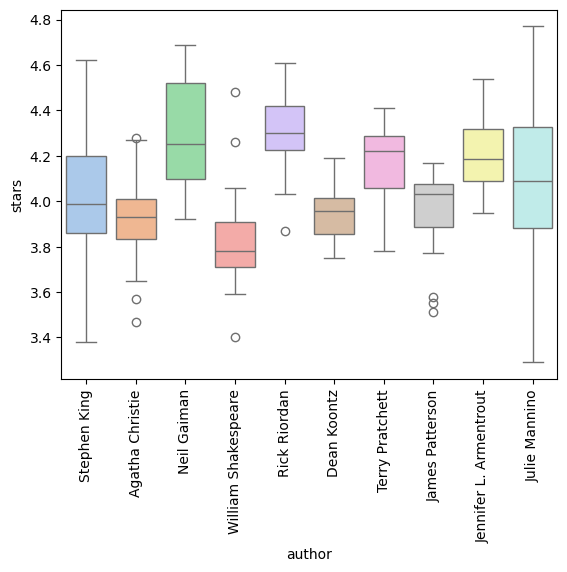

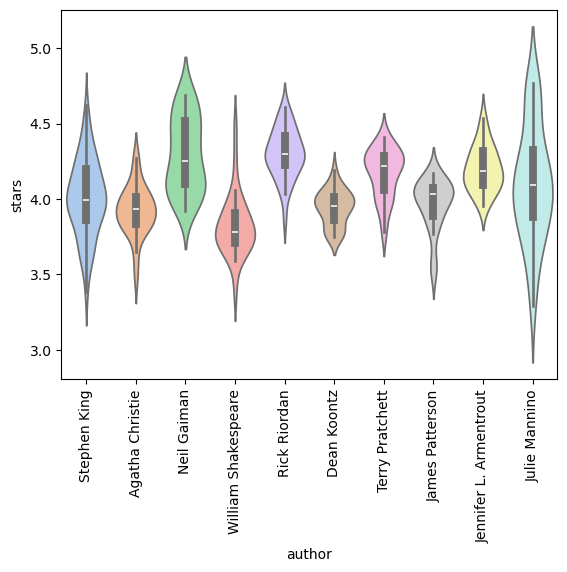

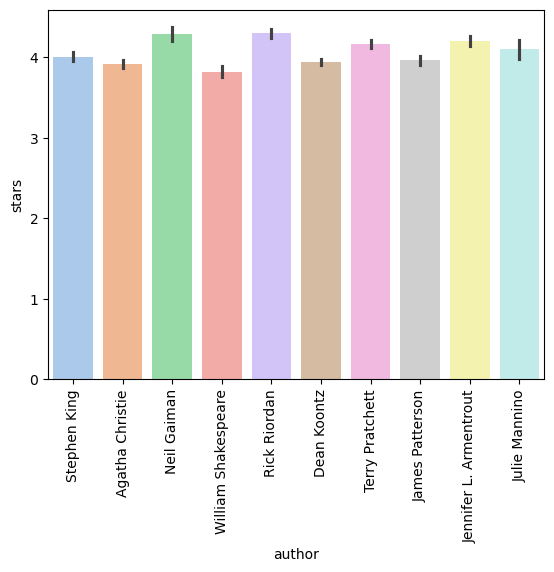

In [64]:
# Top 10 author and stars

#First we filter our original DF to obtain the top 10 authors with all the columns
df_10_authors = df[df['author'].isin(top_10_author)] #top_10_author is a variable from the Univarible Analysis in author. 

#Now we can plot our authors with the stars 

#Box plots show the median, quartiles, and potential outliers, providing a quick snapshot of the data's spread and central tendency.

sns.boxplot(data=df_10_authors, x="author", y="stars", palette="pastel") 
plt.xticks(rotation=90) 
plt.show()

# The violinplot combines a box plot with a kernel density plot to show the distribution of a continuous variable for each category.
sns.violinplot(data=df_10_authors, x="author", y="stars", palette="pastel",) 
plt.xticks(rotation=90)  #We rotate the labels on the x
plt.show()

#The Bar Charts shows the mean (or another measure of central tendency) of the continuous variable for each category.

sns.barplot(data=df_10_authors, x="author", y="stars", palette="pastel")
plt.xticks(rotation=90)  #We rotate the labels on the x
plt.show()

**Conclusion**


We can conclude from the graphs above that most authors have no outliers in relation to the stars. 
The average number of stars per author is above 3.80. This makes sense because we choose the top 10 authors.

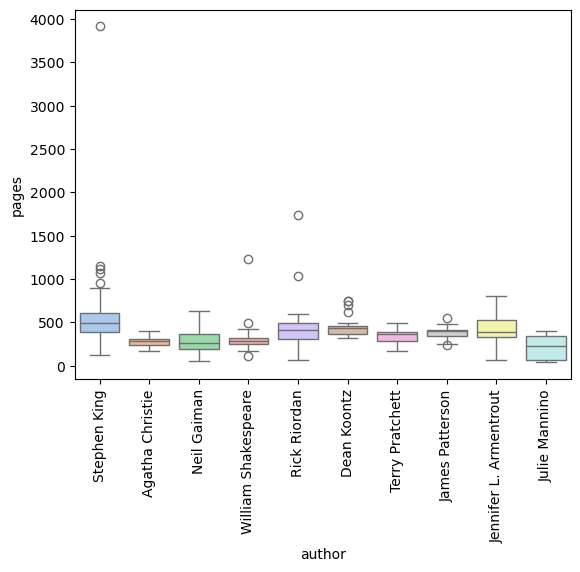

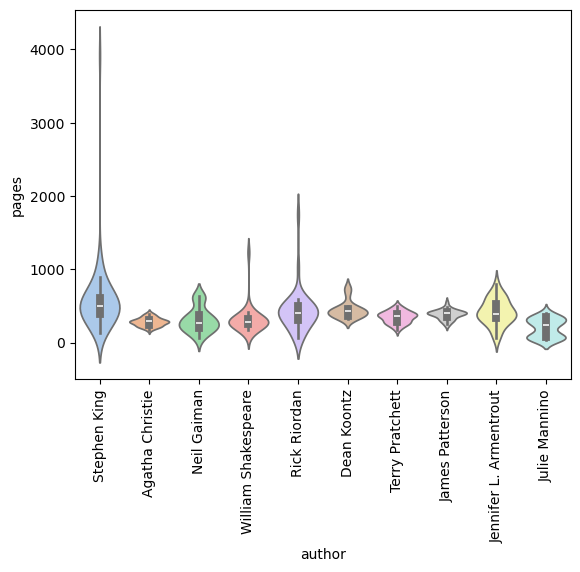

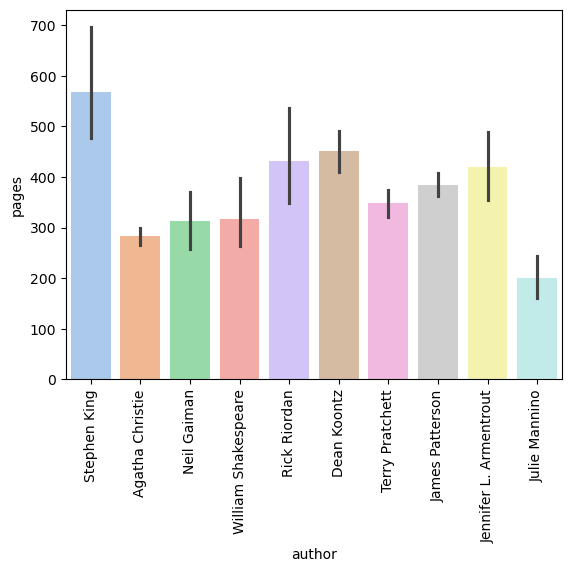

In [66]:
# Top 10 author and pages

#First we filter our original DF to obtain the top 10 authors with all the columns
df_10_authors = df[df['author'].isin(top_10_author)] #top_10_author is a variable from the Univarible Analysis in author. 

#Now we can plot our authors with the stars 

#Box plots show the median, quartiles, and potential outliers, providing a quick snapshot of the data's spread and central tendency.

sns.boxplot(data=df_10_authors, x="author", y="pages", palette="pastel") 
plt.xticks(rotation=90) 
plt.show()

# The violinplot combines a box plot with a kernel density plot to show the distribution of a continuous variable for each category.
sns.violinplot(data=df_10_authors, x="author", y="pages", palette="pastel",) 
plt.xticks(rotation=90)  #We rotate the labels on the x
plt.show()

#The Bar Charts shows the mean (or another measure of central tendency) of the continuous variable for each category.

sns.barplot(data=df_10_authors, x="author", y="pages", palette="pastel")
plt.xticks(rotation=90)  #We rotate the labels on the x
plt.show()

**Conclusion**


We can see that Stephen King's books have a higher average number of pages than the other authors. 

We can also see that the average number of pages of the top 10 authors is 388. Most of the books have a total of 448 pages and the book with the highest number of pages is “The Dark Tower Series: Books 1-7” with 3914 pages by Stephen King. 

<h4 style="color: #f3b5b5;">Categorical (incl. Discrete numerical) VS Categorical</h4>


Crosstab
Chi-square tests, Cramér's V


Visualization:
Stacked or grouped bar charts
Frequency heat maps

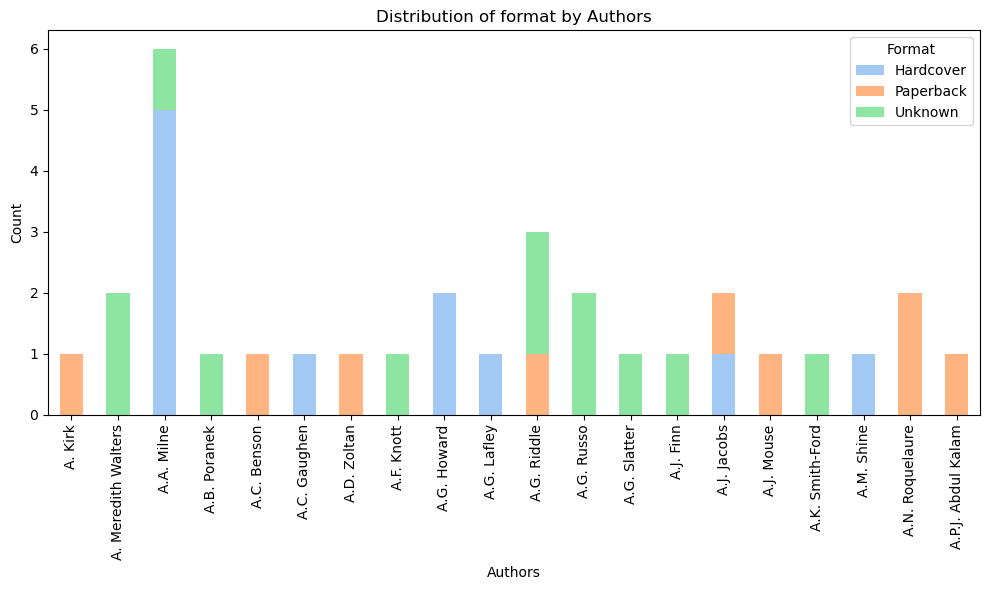

In [70]:
#crosstab by author and format
crosstab_result_format = pd.crosstab( index = cat["author"],columns = cat["format"])
crosstab_result_format

#Let's apply a head of 20 to see this on a plot because we have a lot of authors this way it is more visually aesthetic.
author_20 = crosstab_result_format.head(20)

# We create a color palette to keep our format 
pastel_colors = sns.color_palette("pastel", n_colors=50)

#We plot our reduced table
author_20.plot(kind='bar', stacked=True, color=pastel_colors, figsize=(10, 6))
plt.title("Distribution of format by Authors")
plt.xlabel("Authors")
plt.ylabel("Count")
plt.legend(title="Format")
plt.tight_layout()
plt.show()

**Chi-square tests**
Tests the independence of two categorical variables by comparing observed frequencies to expected frequencies.

- The chi-square determine whether there is a significant association between two categorical variables.
  
- Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables. 

In [72]:
# Chi-square test for 'authors' and 'format', 
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(author_20) 

**Cramér's V** measures the strength of the association between two categorical variables.

- Cramer's V is a measure of association used to quantify the strength of the relationship between categorical variables.

- Interpretation: Cramer's V ranges from 0 to 1, where 0 indicates no association, and 1 represents a perfect association between the variables. A higher value of Cramer's V indicates a stronger relationship between the categorical variables.

In [74]:
# Computing the association between variables in 'author_20' using the "cramer" method.
Cramer = round(association(author_20, method='cramer'),3)

In [75]:
print(f'The P_value is {round(chi2_pvalue,3)} and the Cramers V is {Cramer}')

The P_value is 0.065 and the Cramers V is 0.901


We can conclude that there isnt enough evidence to conclude theres a significant association between the variables and with a Cramers V of 0.901 the  association of theses variables is consider as strong.  

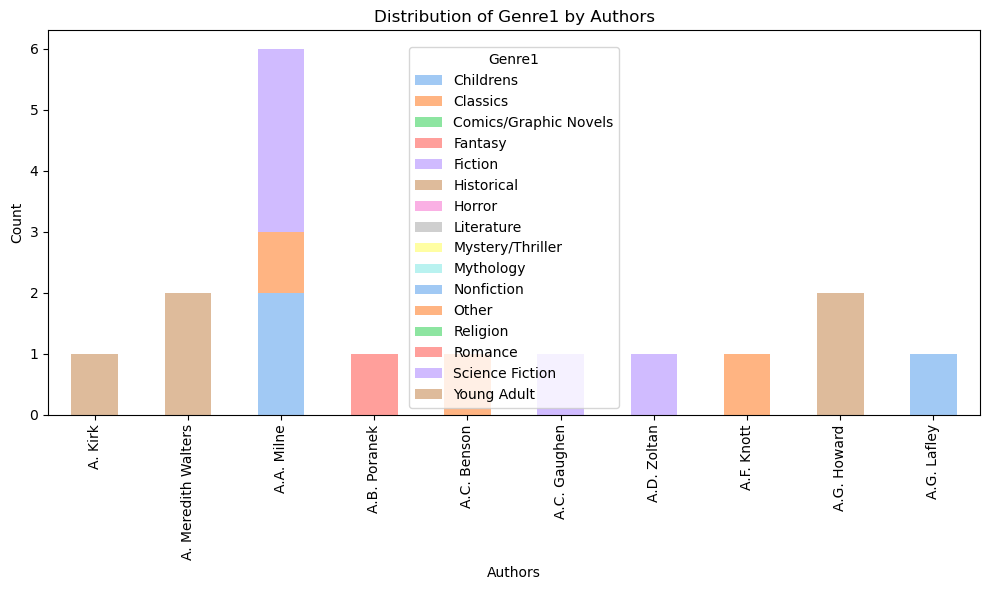

In [77]:
#Crosstab by author and genre1
crosstab_result_genre1 = pd.crosstab( index = cat["author"],columns = cat["genre1"])

#Let's apply a head of 10 to see this on a plot because we have a lot of genres this way it is more visually aesthetic.
plot_genre1=crosstab_result_genre1.head(10)


#We plot our reduced table
plot_genre1.plot(kind='bar', stacked=True, color=pastel_colors, figsize=(10, 6))
plt.title("Distribution of Genre1 by Authors")
plt.xlabel("Authors")
plt.ylabel("Count")
plt.legend(title="Genre1")
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

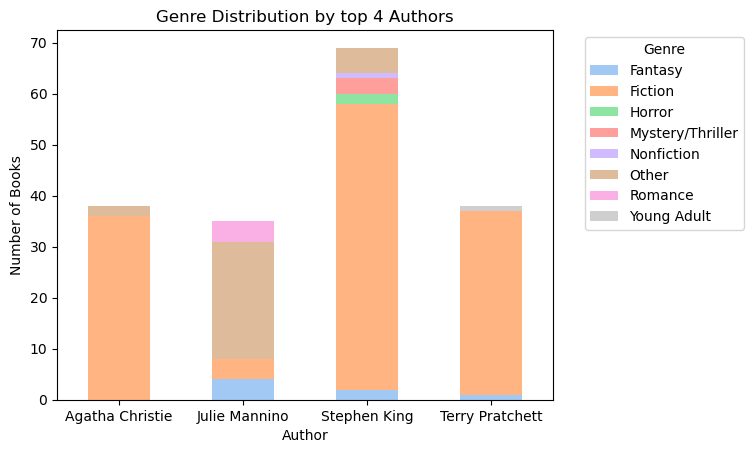

In [78]:
#Now we are going to see by the 4 authors with more books and their relation with genre1
# As we remember on the section: Univarible Analysis -->Categorical-->author we already have the top ten authors in the variable "filtered_authors"
#We take the names from that data frame: Stephen King, Agatha Christie,Terry Pratchett and Julie Mannino.

filtered_4_authors = df[df['author'].isin(['Stephen King', 'Agatha Christie','Terry Pratchett','Julie Mannino'])]

genre_counts_by_author = filtered_4_authors.groupby(['author', 'genre1']).size().unstack(fill_value=0)

# Plot genre distribution for each author
plt.figure(figsize=(12, 8))
genre_counts_by_author.plot(kind='bar', stacked=True, cmap='tab10', color=pastel_colors)
plt.title('Genre Distribution by top 4 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

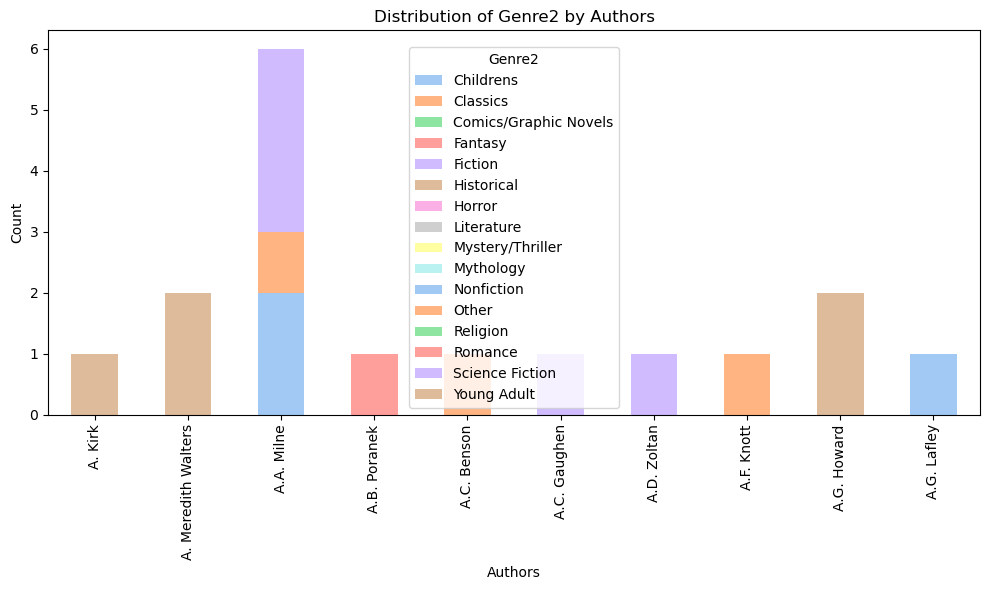

In [79]:
#crosstab by author and genre2
crosstab_result_genre2 = pd.crosstab( index = cat["author"],columns = cat["genre2"])
plot_genre2 = crosstab_result_genre2.head(10)

plot_genre1.plot(kind='bar', stacked=True, color=pastel_colors, figsize=(10, 6))
plt.title("Distribution of Genre2 by Authors")
plt.xlabel("Authors")
plt.ylabel("Count")
plt.legend(title="Genre2")
plt.tight_layout()
plt.show()


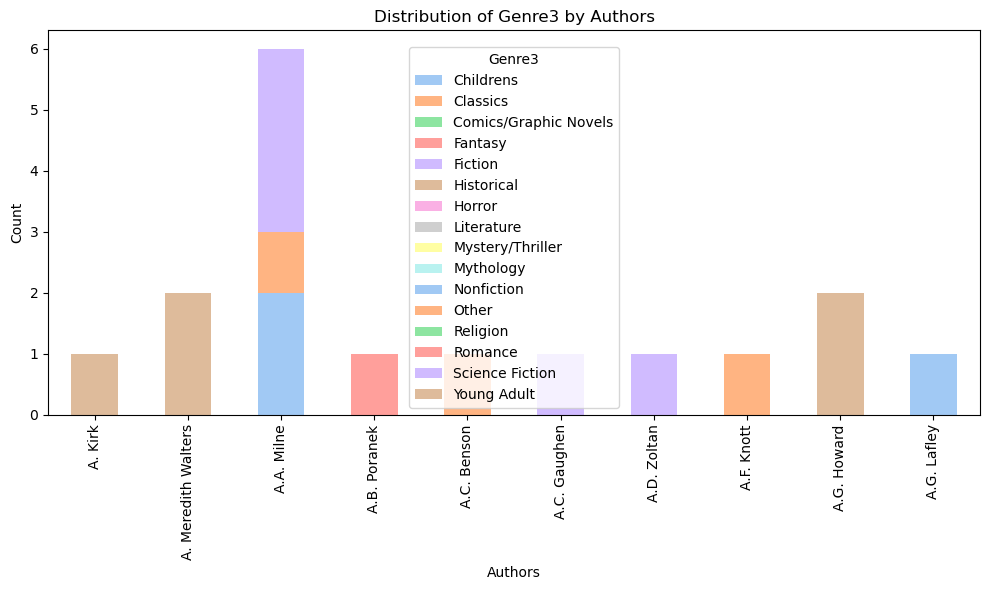

In [80]:
#crosstab by author and genre3
crosstab_result_genre3 = pd.crosstab( index = cat["author"],columns = cat["genre3"])
plot_genre3 = crosstab_result_genre3.head(10)


plot_genre1.plot(kind='bar', stacked=True, color=pastel_colors, figsize=(10, 6))
plt.title("Distribution of Genre3 by Authors")
plt.xlabel("Authors")
plt.ylabel("Count")
plt.legend(title="Genre3")
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

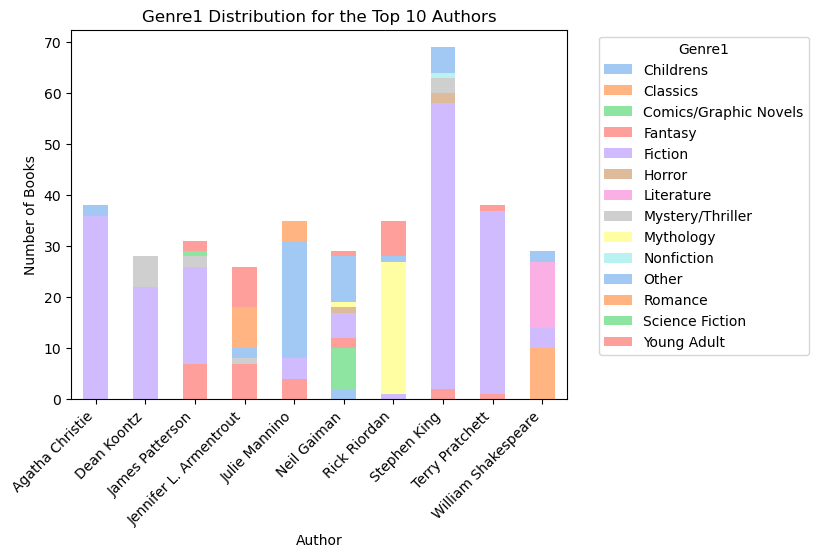

In [81]:
# Filter books by top 10 of authors and genre1
frequency_table_author = df['author'].value_counts().head(10).index.tolist()
filtered_books = df[df['author'].isin(frequency_table_author)]

genre_counts_by_author = filtered_books.groupby(['author', 'genre1']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
genre_counts_by_author.plot(kind='bar', stacked=True, cmap='tab10',color=pastel_colors)
plt.title('Genre1 Distribution for the Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x800 with 0 Axes>

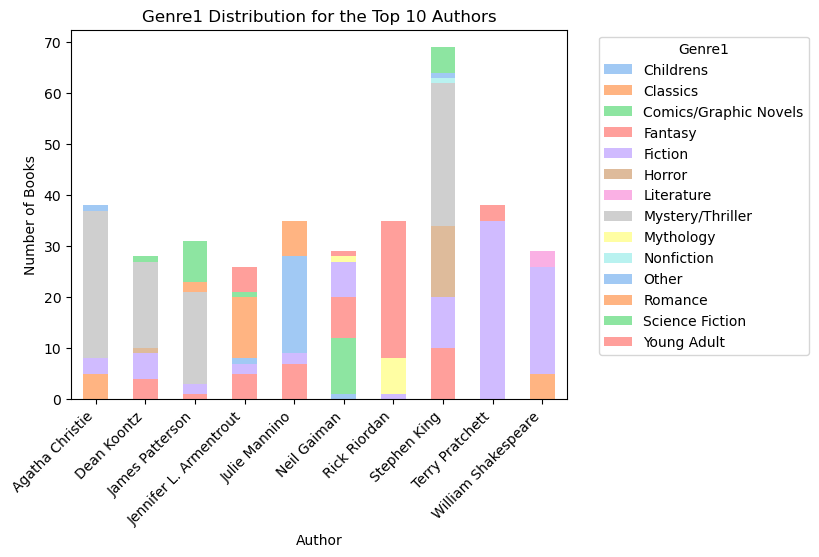

In [82]:
# Filter books by top 10 of authors and genre2
frequency_table_author_g2 = df['author'].value_counts().head(10).index.tolist()
filtered_books_2 = df[df['author'].isin(frequency_table_author_g2)]

genre2_counts_by_author = filtered_books_2.groupby(['author', 'genre2']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
genre2_counts_by_author.plot(kind='bar', stacked=True, cmap='tab10',color=pastel_colors)
plt.title('Genre1 Distribution for the Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x800 with 0 Axes>

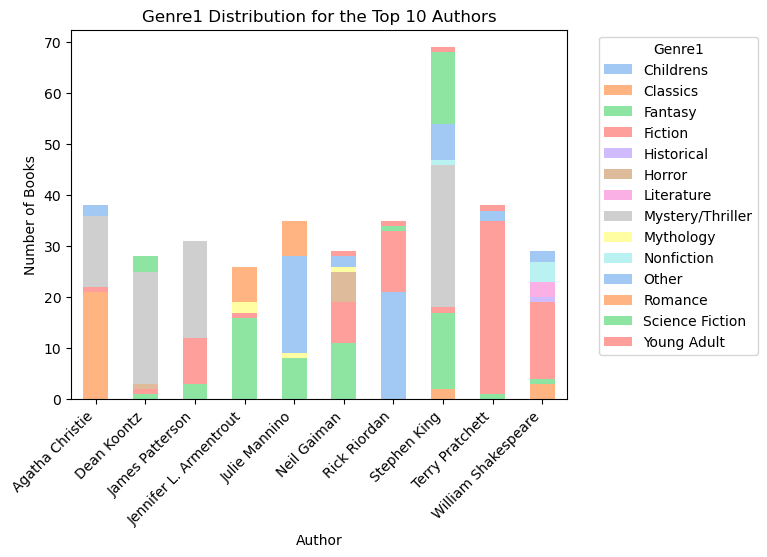

In [83]:
# Here is another way if we would like to filter by top 10 of authors and genre3
frequency_table_author_g3 = df['author'].value_counts().head(10).index.tolist()
filtered_books_3 = df[df['author'].isin(frequency_table_author_g3)]

genre3_counts_by_author = filtered_books_3.groupby(['author', 'genre3']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
genre3_counts_by_author.plot(kind='bar', stacked=True, cmap='tab10',color=pastel_colors)
plt.title('Genre1 Distribution for the Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h4 style="color: #f3b5b5;">Continuous VS Continuous</h4>

Correlation coefficients
Quantifies the strength and direction of the relationship between two continuous variables.

pages,published_year

Correlation coefficients
Visualization:
Scatter plots
Line plots
Correlation Heatmaps
QQ Plot

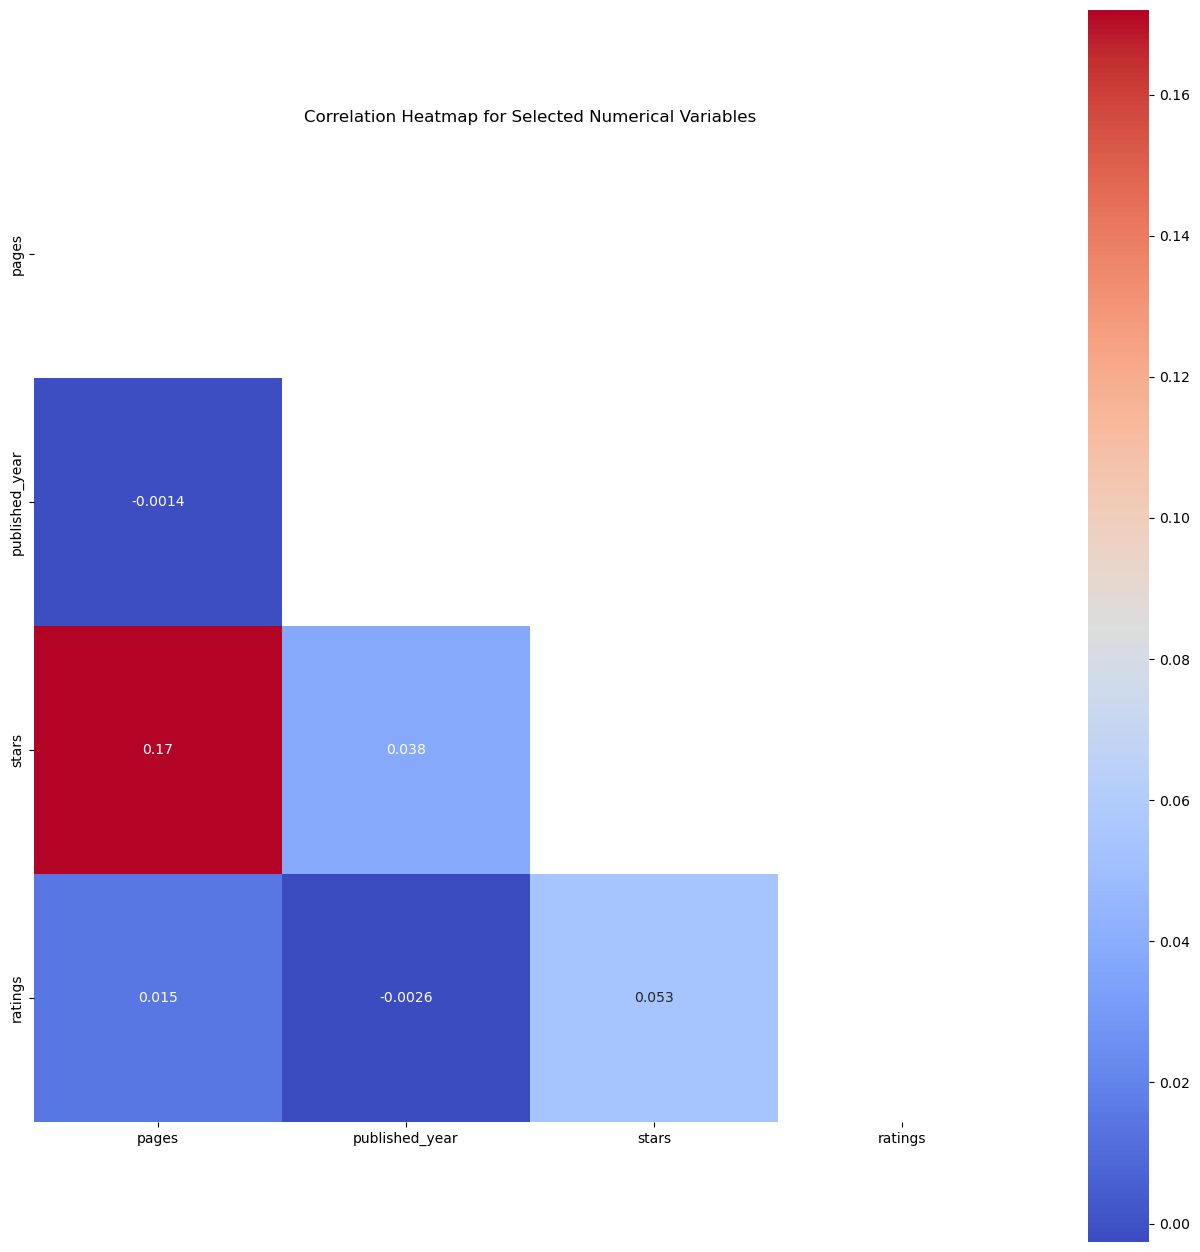

In [87]:
correlation_matrix = num.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(16, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Creating a mask for the upper half of the matrix, this is just to remove the duplicate,
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

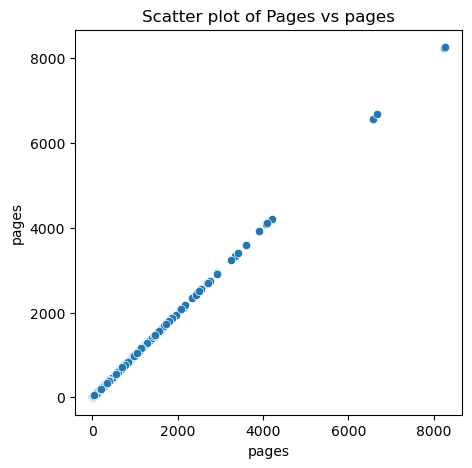

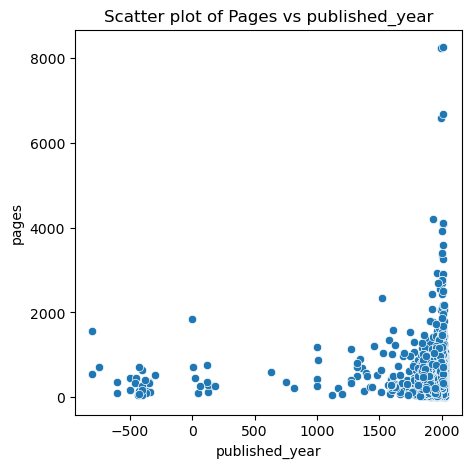

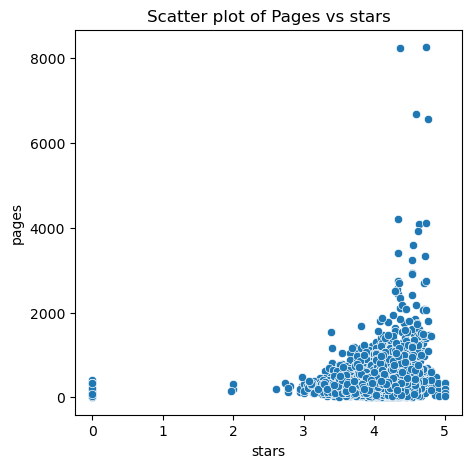

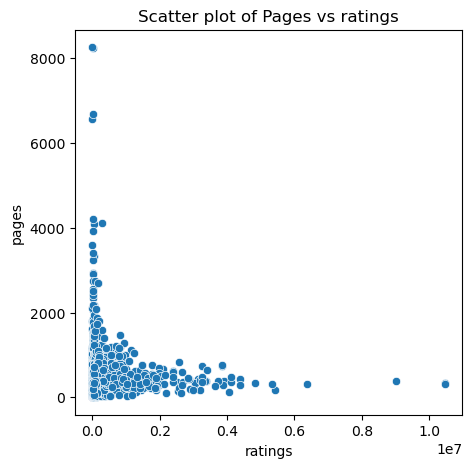

In [88]:
# Plotting scatter plots for each numerical column against 'pages' to visualize their relationships
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Pages vs ' + col)
    sns.scatterplot(data=df, x=col, y='pages')
    plt.show()

In [89]:
#Now we want to know the popularity of genre1 base on ratings, stars and total books
genre_popularity = df.groupby('genre1').agg({'ratings': 'sum', 'stars': 'sum', 'title': 'count'})
genre_popularity = genre_popularity.sort_values(by='title', ascending=False)
print("Most popular genres1 based on number of books, ratings and sta:\n")
print(genre_popularity)

Most popular genres1 based on number of books, ratings and sta:

                         ratings     stars  title
genre1                                           
Fiction                505817086  12062.23   2990
Other                   88497263   6460.80   1594
Young Adult            127223825   4304.69   1057
Nonfiction             104967691   4246.08   1036
Fantasy                 55462991   2729.63    667
Mystery/Thriller        82959423   2309.49    576
Romance                 70560934   2026.33    501
Classics                50479996   1801.97    455
Science Fiction         42929496   1179.74    295
Horror                   8002094    547.50    139
Childrens               17051101    523.26    124
Literature               8869990    268.44     67
Mythology                6746403    201.79     48
Comics/Graphic Novels    3090311    179.44     41
Religion                 2512635    143.38     34
Historical                231406     49.36     12


In [90]:
#Now we want to know the popularity of genre2 base on ratings, stars and total books
genre_popularity = df.groupby('genre2').agg({'ratings': 'sum', 'stars': 'sum', 'title': 'count'})
genre_popularity = genre_popularity.sort_values(by='title', ascending=False)
print("Most popular genres2 based on number of books, ratings and sta:\n")
print(genre_popularity)

Most popular genres2 based on number of books, ratings and sta:

                         ratings     stars  title
genre2                                           
Fiction                321829519  10741.06   2658
Other                  111913150   5096.29   1249
Nonfiction             108070527   4823.33   1192
Fantasy                111537823   4039.93    993
Mystery/Thriller       108297157   3325.19    834
Romance                 97374734   2711.89    671
Science Fiction         56371036   1487.02    373
Young Adult            107305922   1532.11    372
Classics                51249650   1430.79    355
Historical              37607863   1395.90    336
Childrens               21274748    860.94    207
Literature              15748039    673.64    172
Horror                   9524976    486.41    122
Comics/Graphic Novels    4858171    266.75     62
Mythology               12439330    162.88     40


In [91]:
#Now we want to know the popularity of genre3 base on ratings, stars and total books
genre_popularity = df.groupby('genre3').agg({'ratings': 'sum', 'stars': 'sum', 'title': 'count'})
genre_popularity = genre_popularity.sort_values(by='title', ascending=False)
print("Most popular genres3 based on number of books, ratings and sta:\n")
print(genre_popularity)

Most popular genres3 based on number of books, ratings and sta:

                         ratings    stars  title
genre3                                          
Fiction                274464052  8252.28   2049
Other                  150131599  7802.54   1919
Fantasy                187519507  4555.89   1113
Mystery/Thriller       101321764  3226.96    813
Nonfiction              92237233  3103.73    759
Romance                 75178016  2638.74    655
Historical              54792722  1993.35    490
Science Fiction         56010669  1446.29    356
Classics                39083319  1274.79    316
Young Adult             47973486  1292.13    313
Regional                19563382   973.80    242
Childrens               28790087   918.28    223
Literature              35361855   883.70    222
Horror                   8115331   352.20     90
Mythology                1653336   135.59     33
Religion                 1708860   100.81     24
Comics/Graphic Novels    1497427    83.05     19


**Conclusion**

We can see that `Fiction` is clearly the most popular gender in the 3 gender clasificacions tha we have (`genres1` , `genres2` , `genres3` ). 